In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from prettytable import PrettyTable

In [2]:
df_red = pd.read_csv('data/wine_quality/winequality-red.csv', sep=';')

In [3]:
df_white = pd.read_csv('data/wine_quality/winequality-white.csv', sep=';')

In [4]:
df_red.shape

(1599, 12)

#### Exploring the red wine dataset

In [5]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Observations:
1. No variables have missing values
2. Only target variable is of 'int' data type. Rest all are 'float' values.

In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Observations:

Difference between the 75% value and the max value is huge (considering the scale) for almost all variables except density and alcohol. 

To be sure we perform univariate analysis on each feature using histograms and boxplots.

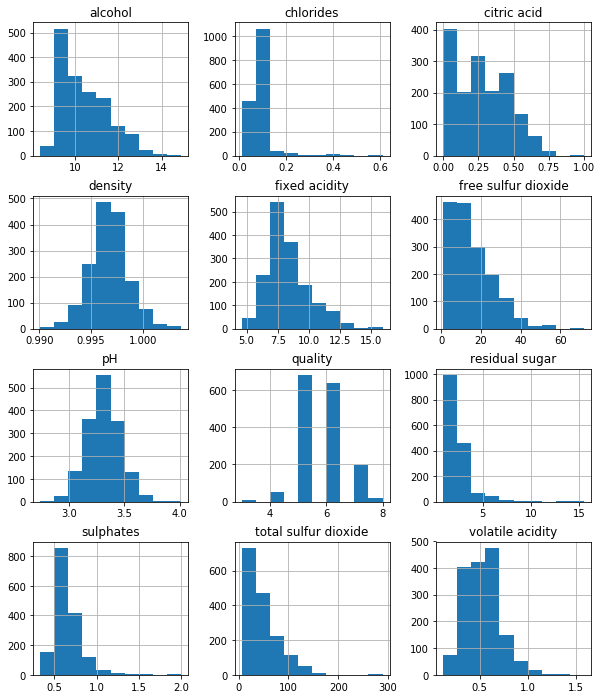

In [8]:
df_red.hist(figsize=(10,12))
plt.show()

In [9]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Important Note:
The above result shows that the target variable values 5 and 6 have a very high count, followed by 7 which has a medium level count.

However, the values 3, 4 and 8 have an extremely low count.

This tells us that the classification problem w.r.t the target variable 'quality' is highly imbalanced!

To explore: What is to be done when target variable value counts are imbalanced to a large extent?

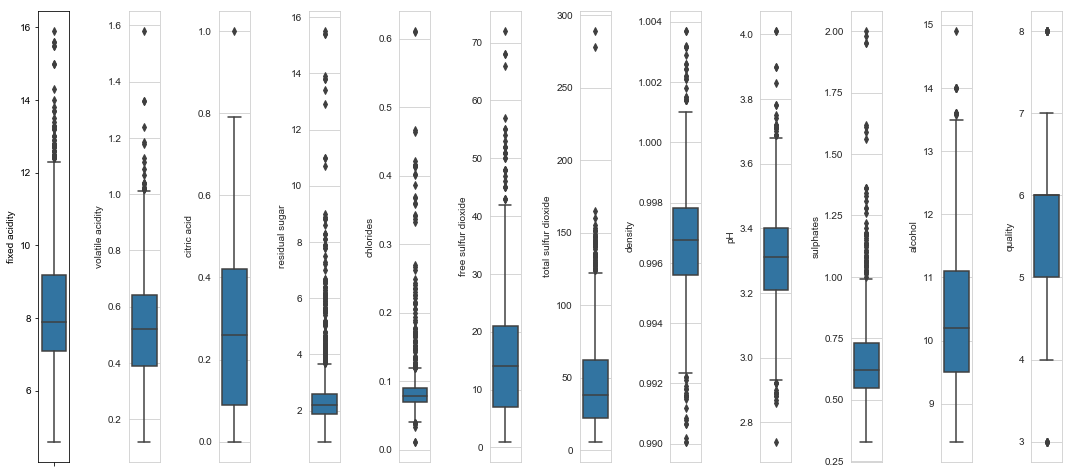

In [10]:
names_arr = df_red.columns.values
plt.figure(figsize=(15,65))

for i in range(0,12):
    plt.subplot(10,12,i+1)
    sns.boxplot( df_red[names_arr[i]], orient='v')
    sns.set_style('whitegrid')
    plt.tight_layout()

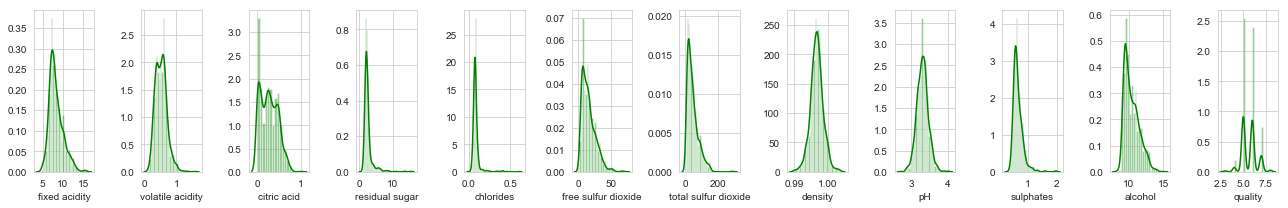

In [11]:
f, axes = plt.subplots(1, 12, figsize=(18, 3))

for i in range(12):
    sns.distplot(df_red[names_arr[i]], ax=axes[i], color='green')
plt.tight_layout()

##### Observations:
The above distribution plot for each variable tells us that most variables have a positively skewed distribution.

The features 'pH' and 'density' seem to have a normal distribution.

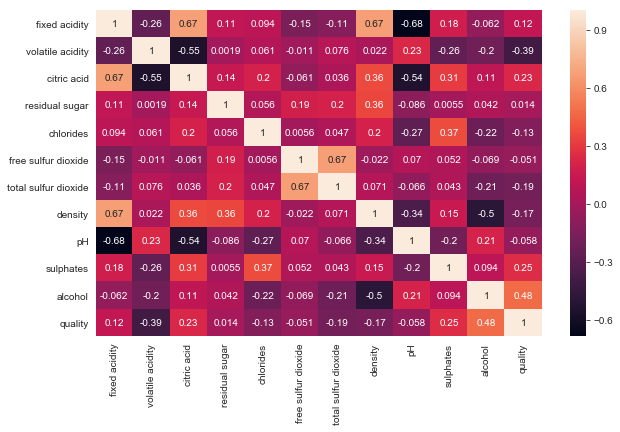

In [12]:
corr_mat = df_red.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True)
plt.show()

##### Observations:
Based on the above observations of the heatmap, we should be excluding:
1. Variables which have a low or no correlation with the target variable 'quality'
2. Also, for 2 variables (excluding the target variable) which have a high correlation among themselves, we can remove one of the variables as having both is redundant. (as they would assist us in almost the same manner)

#### ---------------------------------- Prediction Section --------------------------------------

In [13]:
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib

from prettytable import PrettyTable

#### Separating the target variable from the independent variables

In [14]:
Y = df_red['quality']
X = df_red.drop(columns='quality')

First, we will predict the quality variable with all our features.

We can later drop some unnecessary features and see if this actually improves the model's performance.

In [15]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)

In [16]:
Y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

This means that the target variable "quality" only contains the score values of 3, 4, 5, 6, 7 and 8, when the potential scores can range from 0 to 10

In [17]:
models=[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [18]:
all_results=[]
model_names=[]
t = PrettyTable(['Model Name', 'Mean Accuracy', 'Std Dev in the 10 scores', 'Coeff. of Variation'])
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=2)
    cv_scores = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    all_results.append(cv_scores)
    model_names.append(name)
    t.add_row([name, round(cv_scores.mean(), 5), round(cv_scores.std(), 5), round(cv_scores.std()/cv_scores.mean(), 5)])
print(t)

+------------+---------------+--------------------------+---------------------+
| Model Name | Mean Accuracy | Std Dev in the 10 scores | Coeff. of Variation |
+------------+---------------+--------------------------+---------------------+
|     LR     |    0.57467    |         0.03272          |       0.05693       |
|    KNN     |    0.50745    |         0.03051          |       0.06012       |
|    SVM     |    0.56842    |         0.03881          |       0.06827       |
|    CART    |    0.60525    |          0.0469          |       0.07749       |
|     NB     |    0.53248    |         0.04066          |       0.07635       |
+------------+---------------+--------------------------+---------------------+


My assumptions: (TBC!)

1. Coeff. of variation has just been calculated here for information.
It has no impact over the algorithm that we will choose.
Same goes for Standard Deviation. (TBC!!!!!!)

2. The highest mean accuracy appears for the Decision Tree classifier.
However, the variance of the accuracy scores is also high for this classifier.
Just to confirm we will test some of the algorithms.

In [19]:
def print_results(Y_test, Y_pred):
    print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
    print("\nConfusion Matrix:\n",metrics.confusion_matrix(Y_test, Y_pred))
    print("\nClassification Report:\n",metrics.classification_report(Y_test, Y_pred))

#### 1. Logistic Regression

In [48]:
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
Y_pred_LR = log_reg.predict(X_test)

In [50]:
print_results(Y_test, Y_pred_LR)

Accuracy score:  0.596875

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   8   5   0   0]
 [  0   0 106  33   1   0]
 [  0   0  48  83   3   0]
 [  0   0   4  24   2   0]
 [  0   0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.63      0.76      0.69       140
           6       0.57      0.62      0.59       134
           7       0.29      0.07      0.11        30
           8       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.54      0.60      0.56       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Saving the model (once):
joblib.dump(log_reg, 'models/UCI_wine/LR_classifier.joblib')

['models/UCI_wine/LR_classifier.joblib']

#### 2. Decision Tree Classifier

In [2]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [24]:
Y_pred_CART = dtree.predict(X_test)

print_results(Y_test, Y_pred_CART)

Accuracy score:  0.65

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   2   5   6   0   0]
 [  0   1 107  24   8   0]
 [  0   4  36  81  10   3]
 [  0   0   4   9  17   0]
 [  0   0   0   0   1   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.15      0.20        13
           5       0.70      0.76      0.73       140
           6       0.68      0.60      0.64       134
           7       0.47      0.57      0.52        30
           8       0.25      0.50      0.33         2

   micro avg       0.65      0.65      0.65       320
   macro avg       0.40      0.43      0.40       320
weighted avg       0.65      0.65      0.65       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Observations:
1. The model performance demonstrates a high variance low bias situation.
2. The accuracy is high, however has a lot of variance.

#### 3. KNN Classifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print_results(Y_test, Y_pred_KNN)

Accuracy score:  0.503125

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  9  4  0  0]
 [ 0  0 95 40  5  0]
 [ 0  1 62 59 12  0]
 [ 0  0  7 16  7  0]
 [ 0  0  0  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.55      0.68      0.61       140
           6       0.49      0.44      0.46       134
           7       0.28      0.23      0.25        30
           8       0.00      0.00      0.00         2

   micro avg       0.50      0.50      0.50       320
   macro avg       0.22      0.23      0.22       320
weighted avg       0.47      0.50      0.48       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Hyperparameter tuning for the CART model

In [44]:
X_train.mean(axis=0)

fixed acidity            8.302658
volatile acidity         0.531302
citric acid              0.268679
residual sugar           2.548280
chlorides                0.087582
free sulfur dioxide     15.758014
total sulfur dioxide    45.756059
density                  0.996739
pH                       3.314988
sulphates                0.659351
alcohol                 10.443471
dtype: float64

In [27]:
X_train.std(axis=0)

fixed acidity            1.777663
volatile acidity         0.178592
citric acid              0.197905
residual sugar           1.399418
chlorides                0.047595
free sulfur dioxide     10.453895
total sulfur dioxide    32.167225
density                  0.001920
pH                       0.156883
sulphates                0.168843
alcohol                  1.082096
dtype: float64

In [28]:
def print_mean_std_table(col_names, mean_values, std_dev_values):
    t = PrettyTable(['Column Name', 'Mean', 'Std Dev'])
    for c, m, s in zip(col_names, mean_values, std_dev_values):
        t.add_row([c, m, s])
    print(t)

In [29]:
print_mean_std_table(np.array(X_train.columns), X_train.mean(axis=0), X_train.std(axis=0))

+----------------------+---------------------+-----------------------+
|     Column Name      |         Mean        |        Std Dev        |
+----------------------+---------------------+-----------------------+
|    fixed acidity     |  8.302658326817818  |   1.7776633045891042  |
|   volatile acidity   |  0.5313017982799059 |   0.1785921458041467  |
|     citric acid      | 0.26867865519937434 |  0.19790543838134703  |
|    residual sugar    |  2.5482799061767016 |   1.399417555958952   |
|      chlorides       |  0.0875817044566063 |  0.04759506763450628  |
| free sulfur dioxide  |  15.758014073494918 |   10.453895177325927  |
| total sulfur dioxide |  45.75605942142299  |   32.16722481866922   |
|       density        |  0.9967393666927264 | 0.0019200458855654786 |
|          pH          |  3.3149882720875756 |  0.15688271693626113  |
|      sulphates       |  0.6593510555121186 |   0.1688434407758159  |
|       alcohol        |  10.44347146207974  |   1.0820955924434161  |
+-----

Now let us regularize all values and check their mean and standard deviations

In [30]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [31]:
X_train_scaled = scaler.transform(X_train)

In [32]:
print_mean_std_table(np.array(X_train.columns), X_train_scaled.mean(axis=0), X_train_scaled.std(axis=0))

+----------------------+-------------------------+--------------------+
|     Column Name      |           Mean          |      Std Dev       |
+----------------------+-------------------------+--------------------+
|    fixed acidity     |  -3.972150555656541e-16 |        1.0         |
|   volatile acidity   | -1.4305297455686146e-16 | 1.0000000000000002 |
|     citric acid      |  4.166591491947421e-17  |        1.0         |
|    residual sugar    | -1.2222001709712434e-16 |        1.0         |
|      chlorides       |  8.333182983894842e-17  |        1.0         |
| free sulfur dioxide  | -1.5277502137140542e-17 |        1.0         |
| total sulfur dioxide |  -8.333182983894842e-17 |        1.0         |
|       density        |  -4.405406627627541e-14 |        1.0         |
|          pH          |  -3.594379593719975e-15 | 1.0000000000000002 |
|      sulphates       |  1.9582980012152879e-16 |        1.0         |
|       alcohol        | -1.1638678900839797e-15 |        1.0   

#### Note:
    
1. 3.56e-2 => (3.56/100) => 0.0356

Hence, in the above table, all the means can be rounded up/down to zero

2. In the above script, we first created a StandardScaler() object and then fit the training data 'X_train' to the scaler object.

3. We then performed the 'transform()' method for the scaling operation on 'X_train' data.

4. In practice, this can be implemented in a pipeline in one step.

** Pipeline **

Pipeline is an abstract notion in Python.
It allows us to sequentially apply a list of transforms and a final estimator.

make_pipline() is just a shorthand constructor for a Pipeline

In [33]:
pipeline = make_pipeline(preprocessing.StandardScaler(), DecisionTreeClassifier())

In [34]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, presort=False, random_state=None,
               splitter='best'))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'standardscaler__copy': True,


The above shows us the various hyperparameters available.

Our job is now to find the best combination of these hyperparameters, which gives us the best result.

We will first mention all the various values the hyperparameters need to test with.

Then we will use GridSearchCV() which is a class allowing us to find out the best combination.

It can take as input our model or (in this case the pipeline object) and the hyperparameters' list

In [35]:
hyperparameters = { 
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 3, 1],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
}

In [36]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [56]:
clf.fit(X_train, Y_train)
print("Best Parameters:\n", clf.best_params_)

Y_pred_CART_tuned = clf.predict(X_test)

print_results(Y_test, Y_pred_CART_tuned)

c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best Parameters:
 {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'log2'}
Accuracy score:  0.646875

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   1   8   4   0   0]
 [  1   2 105  26   5   1]
 [  0   3  28  86  16   1]
 [  0   0   3  12  14   1]
 [  0   0   1   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.08      0.11        13
           5       0.72      0.75      0.73       140
           6       0.67      0.64      0.66       134
           7       0.40      0.47      0.43        30
           8       0.25      0.50      0.33         2

   micro avg       0.65      0.65      0.65       320
   macro avg       0.37      0.41      0.38       320
weighted avg       0.64      0.65      0.64       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Save the model (Pickling)

In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [38]:
#joblib.dump(clf, 'models/CART_classifier.joblib')

Note: dump and load functions also accept file-like object instead of filenames.

Load the model again:

In [39]:
clf = joblib.load('models/CART_classifier.joblib')

In [40]:
Y_pred_CART_tuned = clf.predict(X_test)

print_results(Y_test, Y_pred_CART_tuned)

Accuracy score:  0.65625

Confusion Matrix:
 [[  0   0   0   0   1   0]
 [  0   0   7   5   1   0]
 [  0   2 105  26   7   0]
 [  1   2  26  85  20   0]
 [  0   0   4   6  19   1]
 [  0   0   0   0   1   1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.74      0.75      0.74       140
           6       0.70      0.63      0.66       134
           7       0.39      0.63      0.48        30
           8       0.50      0.50      0.50         2

   micro avg       0.66      0.66      0.66       320
   macro avg       0.39      0.42      0.40       320
weighted avg       0.65      0.66      0.65       320



### -------------------------------- Hyperparameter Tuning for the LR model ---------------------------------------

In [54]:
# Load the model
LR_clf = joblib.load('models/UCI_wine/LR_classifier.joblib')

In [57]:
Y_pred = LR_clf.predict(X_test)
print_results(Y_test, Y_pred)

Accuracy score:  0.596875

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   8   5   0   0]
 [  0   0 106  33   1   0]
 [  0   0  48  83   3   0]
 [  0   0   4  24   2   0]
 [  0   0   0   1   1   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.63      0.76      0.69       140
           6       0.57      0.62      0.59       134
           7       0.29      0.07      0.11        30
           8       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.54      0.60      0.56       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


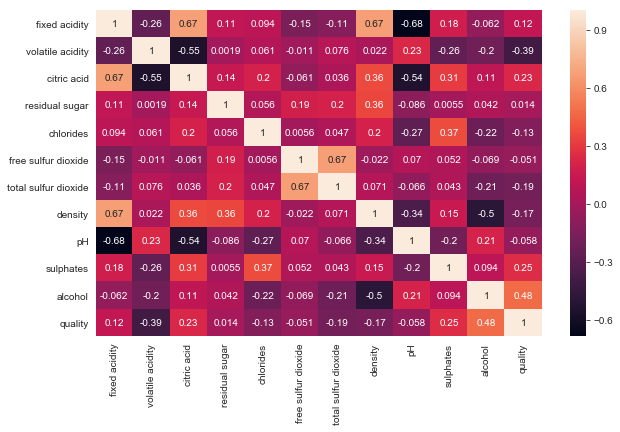

In [82]:
corr = df_red.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [ ]:
#### Dropping:
1. fixed acidity
2. free sulphur dioxide

In [91]:
Y1 = df_red['quality']
X1 = df_red.drop(columns=['quality','fixed acidity','free sulfur dioxide'])

In [92]:
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=123)

In [94]:
log_reg1 = LogisticRegression(multi_class='ovr', solver='liblinear')

In [97]:
log_reg1.fit(X1_train, Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
Y1_pred = log_reg1.predict(X1_test)

In [99]:
print_results(Y1_test, Y1_pred)

Accuracy score:  0.521875

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  9  4  0  0]
 [ 0  0 89 42  0  0]
 [ 0  0 51 78  2  0]
 [ 0  0  1 38  0  0]
 [ 0  0  0  4  1  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.59      0.68      0.63       131
           6       0.47      0.60      0.53       131
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         5

   micro avg       0.52      0.52      0.52       320
   macro avg       0.18      0.21      0.19       320
weighted avg       0.43      0.52      0.47       320



c:\users\niraje\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
